<div style ="text-align: center; background-color: #0099ff; font-family: verdana; color: white; font-size: 45px; font-weight: bold; padding: 15px">
Đồ án quan hoá dữ liệu
</div>

Import package

In [239]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
I. Data understanding
</div>

In [240]:
ls data/

hotel_bookings.csv


In [241]:
pdf = pd.read_csv("data/hotel_bookings.csv")

### 1. Đếm số dòng và số cột.

In [242]:
print("So dong cua Dataset: ", pdf.shape[0])
print("So cot cua Dataset: ", pdf.shape[1])

So dong cua Dataset:  119390
So cot cua Dataset:  32


### 2. Viết bảng mô tả về các cột.

Bang mo ta ve cac cot
* hotel: tên khách sạn, gồm 2 loại (resort hotel và city hotel)
* is_canceled: có hủy hay không (1 là có huỷ và 0 là ngược lại)
* lead_time: thời gian chờ từ lúc đặt lịch trên hệ thống cho tới lúc nhận phòng
* arrival_date_year: năm nhận phòng
* arrival_date_month: tháng nhận phòng
* arrival_date_week_number: tuần trong năm nhận phòng
* arrival_date_day_of_month: ngày nhận phòng trong tháng
* stays_in_weekend_nights: số buổi tối cuối tuần (thứ bảy và chủ nhật) mà khách đã đặt
* stays_in_week_nights: số buổi tối trong tuần mà khách đã đặt
* adults: số người lớn
* children: số trẻ nhỏ
* babies: số em bé
* meal: loại bữa ăn mà khách hàng đặt
* country: 
...

* reservation_status: trạng thái đặt chỗ
* reservation_status_date: ngày trạng thái đặt chỗ


### 3. Lấy 5 điểm dữ liệu ra làm mẫu.

In [243]:
pdf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.000000,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,NaN,0,Transient,75.000000,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,NaN,0,Transient,98.000000,0,1,Check-Out,7/3/2015


### 4. Phân tích tỷ lệ missing rate.

In [244]:
pdf.isnull().sum()/len(pdf)

hotel                            0.000000
is_canceled                      0.000000
lead_time                        0.000000
arrival_date_year                0.000000
arrival_date_month               0.000000
arrival_date_week_number         0.000000
arrival_date_day_of_month        0.000000
stays_in_weekend_nights          0.000000
stays_in_week_nights             0.000000
adults                           0.000000
children                         0.000034
babies                           0.000000
meal                             0.000000
country                          0.004087
market_segment                   0.000000
distribution_channel             0.000000
is_repeated_guest                0.000000
previous_cancellations           0.000000
previous_bookings_not_canceled   0.000000
reserved_room_type               0.000000
assigned_room_type               0.000000
booking_changes                  0.000000
deposit_type                     0.000000
agent                            0

Đa số các cột đều có missing rate bằng 0, trừ 3 cột children, agent và company.

### 5. Phân tích tỷ lệ duplicate.

In [245]:
1-(len(pdf.drop_duplicates())/len(pdf))

0.26797889270458164

Tập dữ liệu có tỉ lệ duplicate tương đối lớn

In [246]:
#Drop những dòng dữ liệu bị duplicate
pdf = pdf.drop_duplicates()

### 6. Fill missing rate.

In [247]:
agent_mode = pdf['agent'].mode()[0]
children_mode = pdf['children'].mode()[0]
pdf.loc[:, ['agent', 'children']] = pdf[['agent', 'children']].fillna(value={'agent': agent_mode, 'children': children_mode})
pdf = pdf.drop('company', axis=1)

Chúng ta sẽ drop cả cột company vì missing rate của cột này quá lớn và fill cột children và agent bằng mode của nó.

In [248]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
II. EDA 1D
</div>

### 1. Chia loại dữ liệu num hoặc cate.

In [249]:
cate_list = list(pdf.dtypes[pdf.dtypes == 'object'].index)
print("There is", len(cate_list), "cate column")

There is 12 cate column


In [250]:
num_list = list(pdf.dtypes[pdf.dtypes != 'object'].index)
print("There is", len(num_list), "num column")

There is 19 num column


#### num 

In [251]:
#Proportion of each column
for i in range(len(num_list)):
    print(pdf[num_list[i]].value_counts(normalize=True))
    print("\n")


is_canceled
0   0.725102
1   0.274898
Name: proportion, dtype: float64


lead_time
0     0.068401
1     0.036798
2     0.022049
3     0.019497
4     0.017964
        ...   
410   0.000011
411   0.000011
371   0.000011
532   0.000011
463   0.000011
Name: proportion, Length: 479, dtype: float64


arrival_date_year
2016   0.485045
2017   0.362625
2015   0.152330
Name: proportion, dtype: float64


arrival_date_week_number
33   0.031958
34   0.028502
32   0.028022
28   0.026820
30   0.026717
31   0.026168
29   0.025138
27   0.024784
35   0.024086
18   0.023903
21   0.023388
15   0.022758
17   0.021488
23   0.021420
20   0.021088
13   0.020802
19   0.020745
25   0.020436
22   0.020058
24   0.019978
26   0.019898
16   0.019875
14   0.019372
41   0.019028
11   0.018971
38   0.018708
7    0.018651
10   0.018651
36   0.018605
43   0.018365
39   0.018193
9    0.018067
12   0.017999
44   0.017735
8    0.017449
37   0.016866
42   0.016534
40   0.016328
53   0.016282
45   0.015046
6    0.014863
47  

In [252]:
pd.options.display.float_format = '{:,.6f}'.format
percentiles = [0.01] + [0.05*x for x in range(1, 20)] + [0.99]

In [253]:
for i in range(len(num_list)):  
    print(pdf[num_list[i]].describe(percentiles=percentiles))

count   87,396.000000
mean         0.274898
std          0.446466
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
15%          0.000000
20%          0.000000
25%          0.000000
30%          0.000000
35%          0.000000
40%          0.000000
45%          0.000000
50%          0.000000
55%          0.000000
60%          0.000000
65%          0.000000
70%          0.000000
75%          1.000000
80%          1.000000
85%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: is_canceled, dtype: float64
count   87,396.000000
mean        79.891368
std         86.052325
min          0.000000
1%           0.000000
5%           0.000000
10%          1.000000
15%          4.000000
20%          7.000000
25%         11.000000
30%         17.000000
35%         23.000000
40%         31.000000
45%         39.000000
50%         49.000000
55%         61.000000
60%         73.000000
65%         88.00000

In [254]:
pdf = pdf[pdf['adr'] >= 0]
pdf = pdf[pdf['adr'] < 5400]

### 3. Phân tích phân phối đối biến num

Cột num đầu tiên và cũng là cột num mang ý nghĩa quyết định của tập dữ liệu

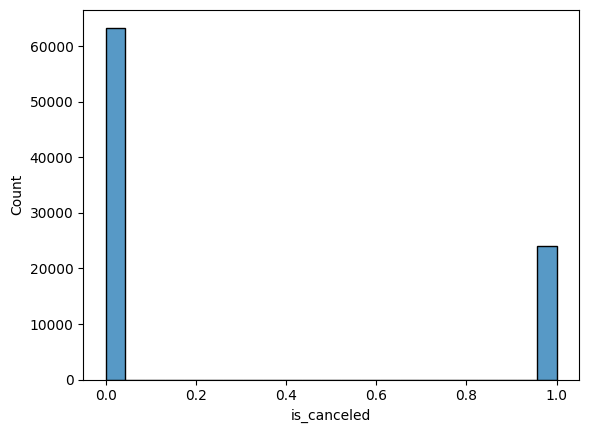

In [255]:
ax = sns.histplot(pdf[num_list[0]])

6 cột num tiếp theo và cũng là 6 cột num có độ đa dạng dữ liệu cao.

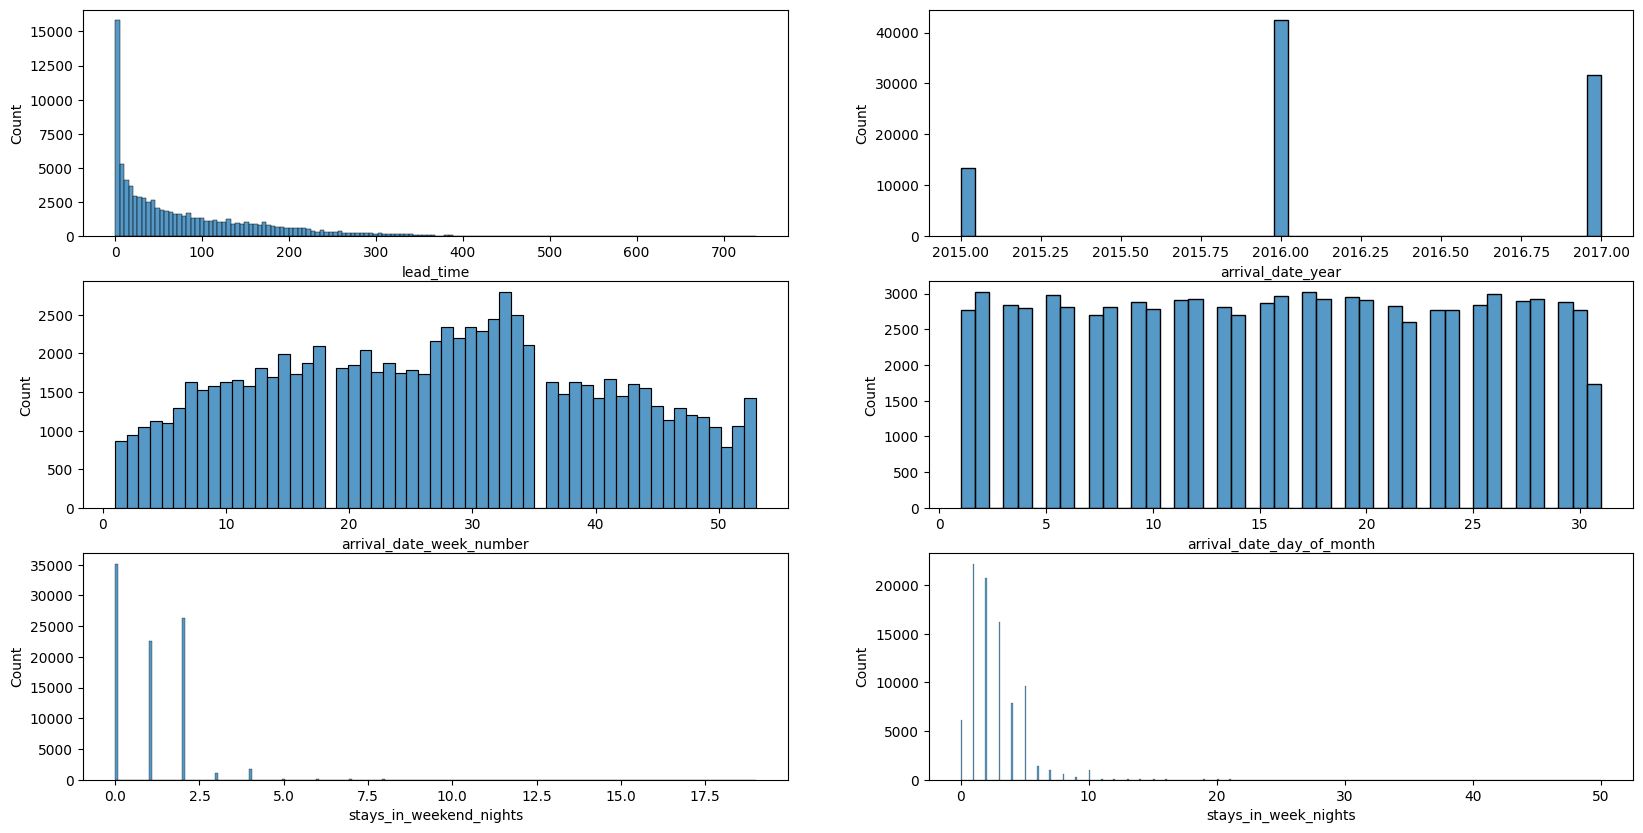

In [256]:
fig = plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for i in range(1,7):
    plt.subplot(3,2,i)
    ax = sns.histplot(pdf[num_list[i]])

5 cột num còn lại có dữ liệu được nằm gọn ở một số giá trị nhất định

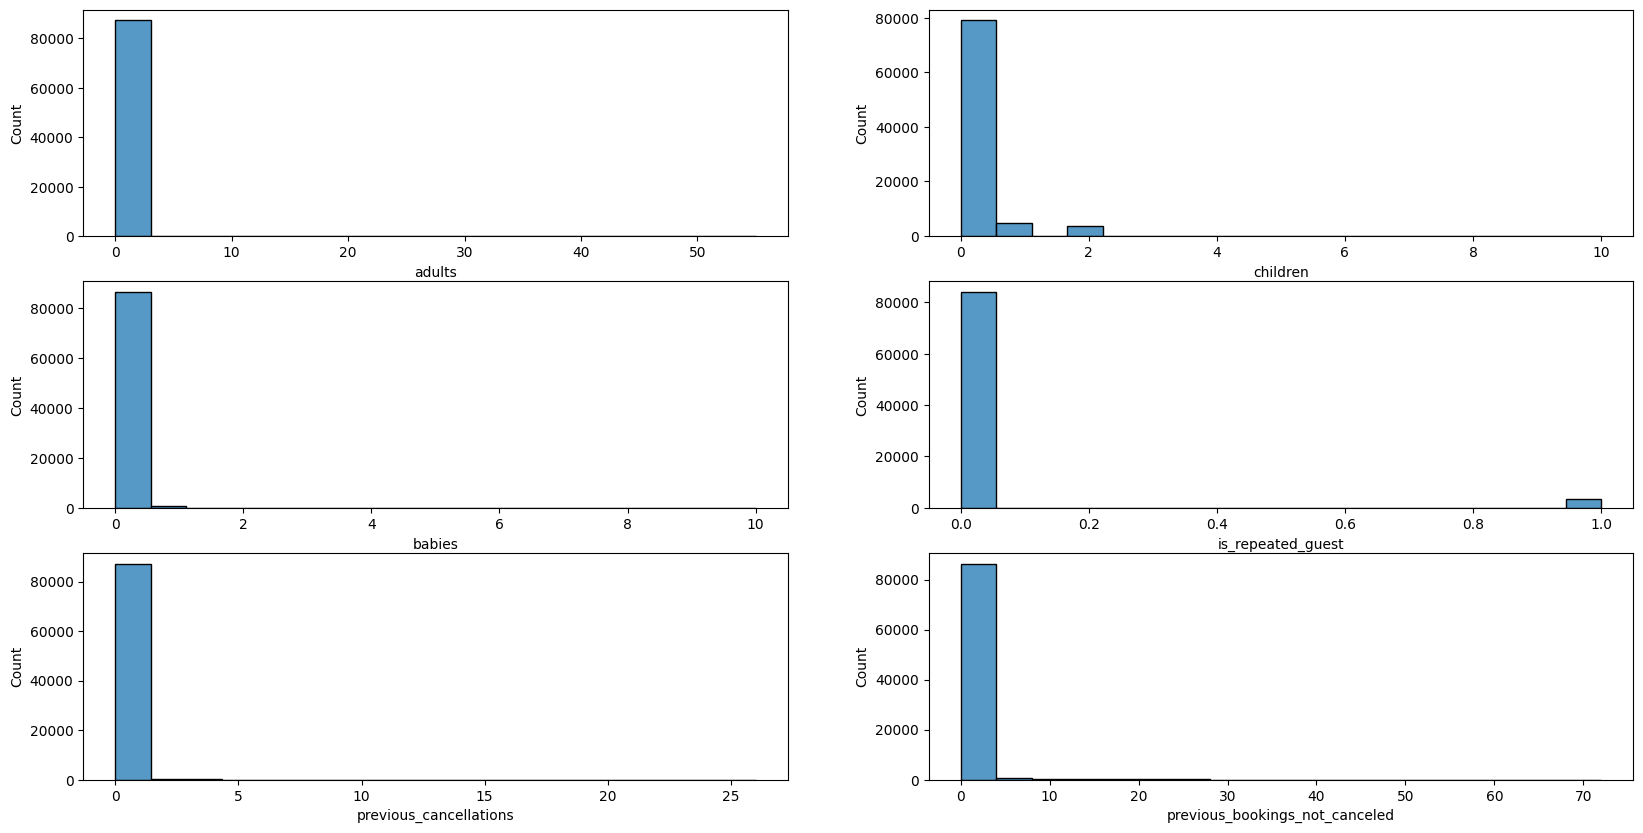

In [257]:
fig = plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for i in range(7, 13):
    plt.subplot(3,2,i-6)
    ax = sns.histplot(pdf[num_list[i]])

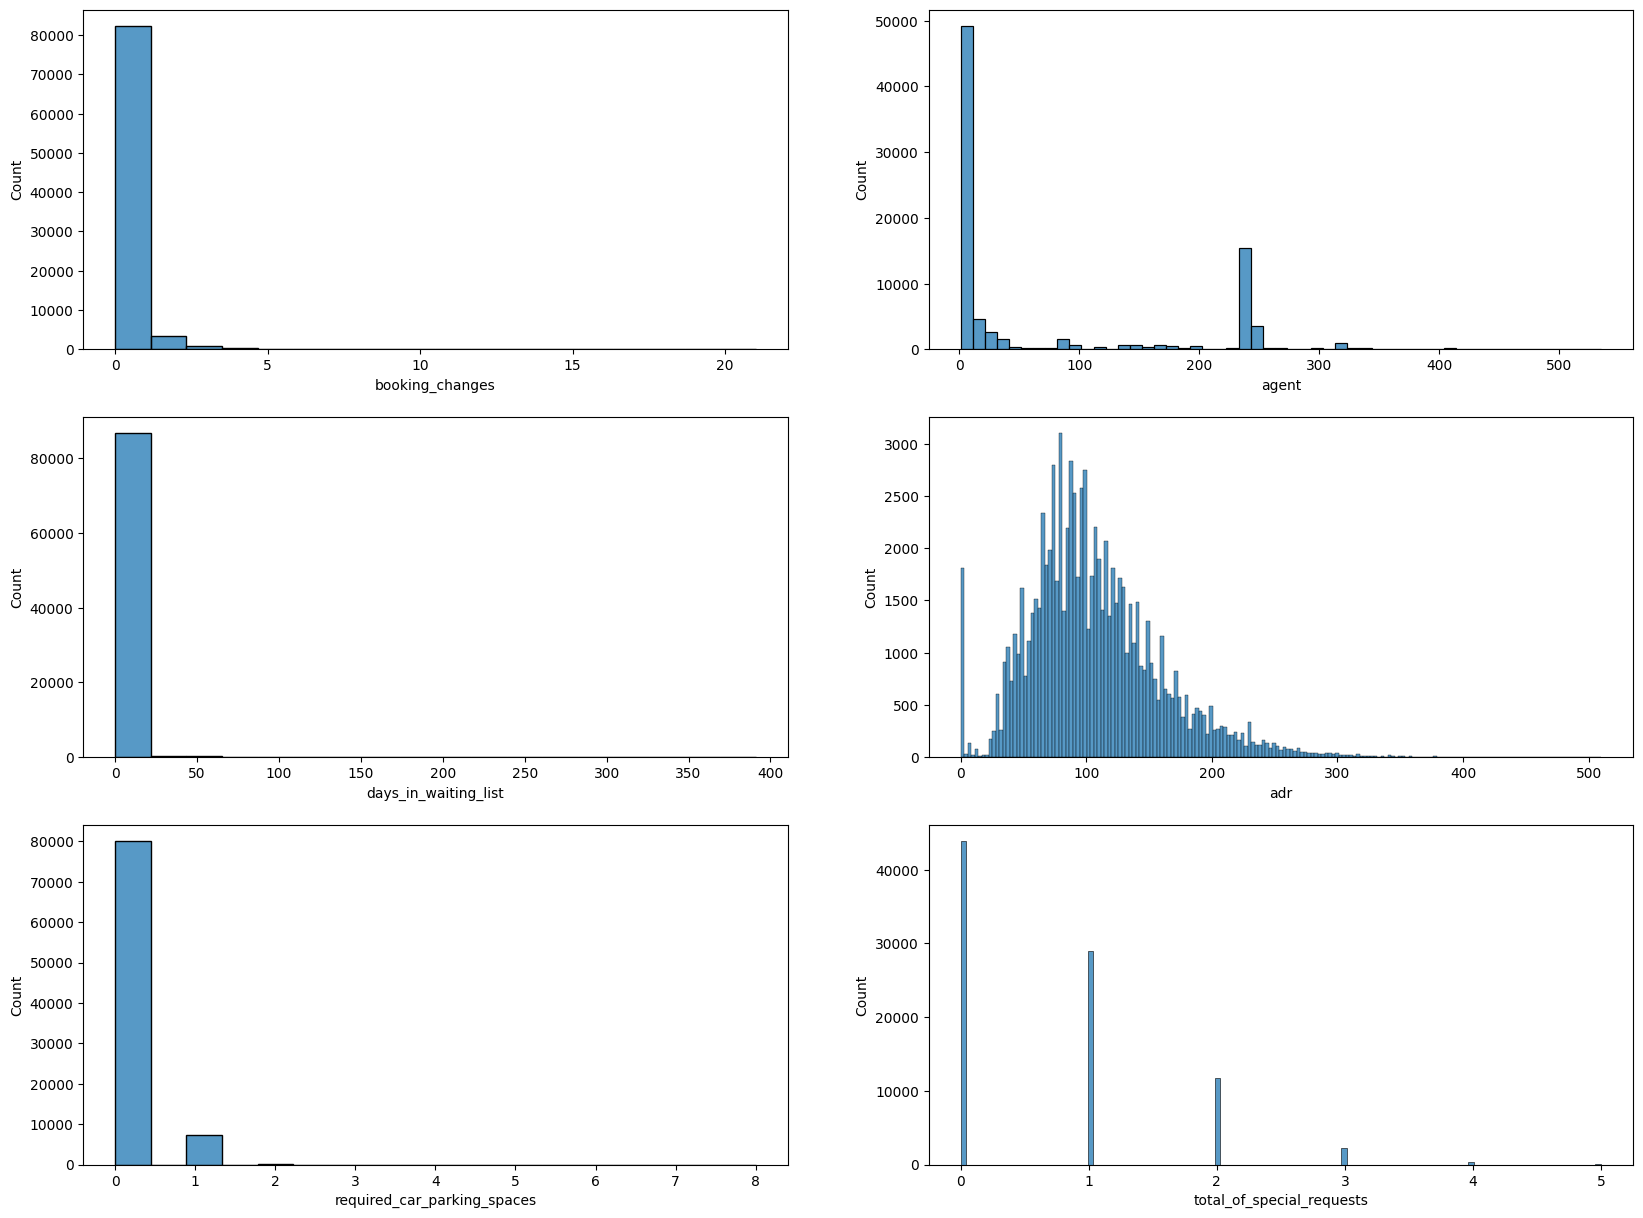

In [275]:
fig = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
for i in range(13, 19):
    plt.subplot(3,2,i-12)
    ax = sns.histplot(pdf[num_list[i]])


**cate**

Tỉ lệ phân phối của các biến cate

In [259]:
for i in range(len(cate_list)):
    print(pdf[cate_list[i]].value_counts(normalize=True))

hotel
City Hotel     0.611335
Resort Hotel   0.388665
Name: proportion, dtype: float64
arrival_date_month
August      0.128807
July        0.115077
May         0.095602
April       0.090487
June        0.088850
March       0.085944
October     0.079342
September   0.076550
February    0.069776
December    0.058711
November    0.057155
January     0.053699
Name: proportion, dtype: float64
meal
BB          0.777811
SC          0.108486
HB          0.103955
Undefined   0.005630
FB          0.004119
Name: proportion, dtype: float64
country
PRT   0.315751
GBR   0.119988
FRA   0.101642
ESP   0.083412
DEU   0.061961
        ...   
MMR   0.000012
BFA   0.000012
CYM   0.000012
MLI   0.000012
KHM   0.000012
Name: proportion, Length: 177, dtype: float64
market_segment
Online TA       0.590636
Offline TA/TO   0.158913
Direct          0.135066
Groups          0.056537
Corporate       0.048196
Complementary   0.008033
Aviation        0.002597
Undefined       0.000023
Name: proportion, dtype: float64

Có 2 biến cate có tỷ lệ phân phối đáng chú ý như:

In [260]:
pdf[cate_list[7]].value_counts(normalize=True)

assigned_room_type
A   0.529922
D   0.256677
E   0.082328
F   0.041502
G   0.028583
C   0.024773
B   0.020825
H   0.008067
I   0.004085
K   0.003158
P   0.000069
L   0.000011
Name: proportion, dtype: float64

Hơn 50% số phòng được phân cho khách đặt lịch là phòng loại A, có vẻ phòng A là loại phòng có số lượng lớn nhất của 2 khách sạn được ghi nhận.

In [261]:
pdf[cate_list[5]].value_counts(normalize=True)

distribution_channel
TA/TO       0.791130
Direct      0.148603
Corporate   0.058139
GDS         0.002071
Undefined   0.000057
Name: proportion, dtype: float64

Một phần rất lớn (gần 80%) lượng đặt phòng là thông qua kênh TA/TO. Đây có vẻ là nền tảng quảng bá và kinh doanh chính của 2 khách sạn của ghi nhận.

<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
III. EDA 2D
</div>

### 1. Phân tích hệ số tương quan giữa các biến num

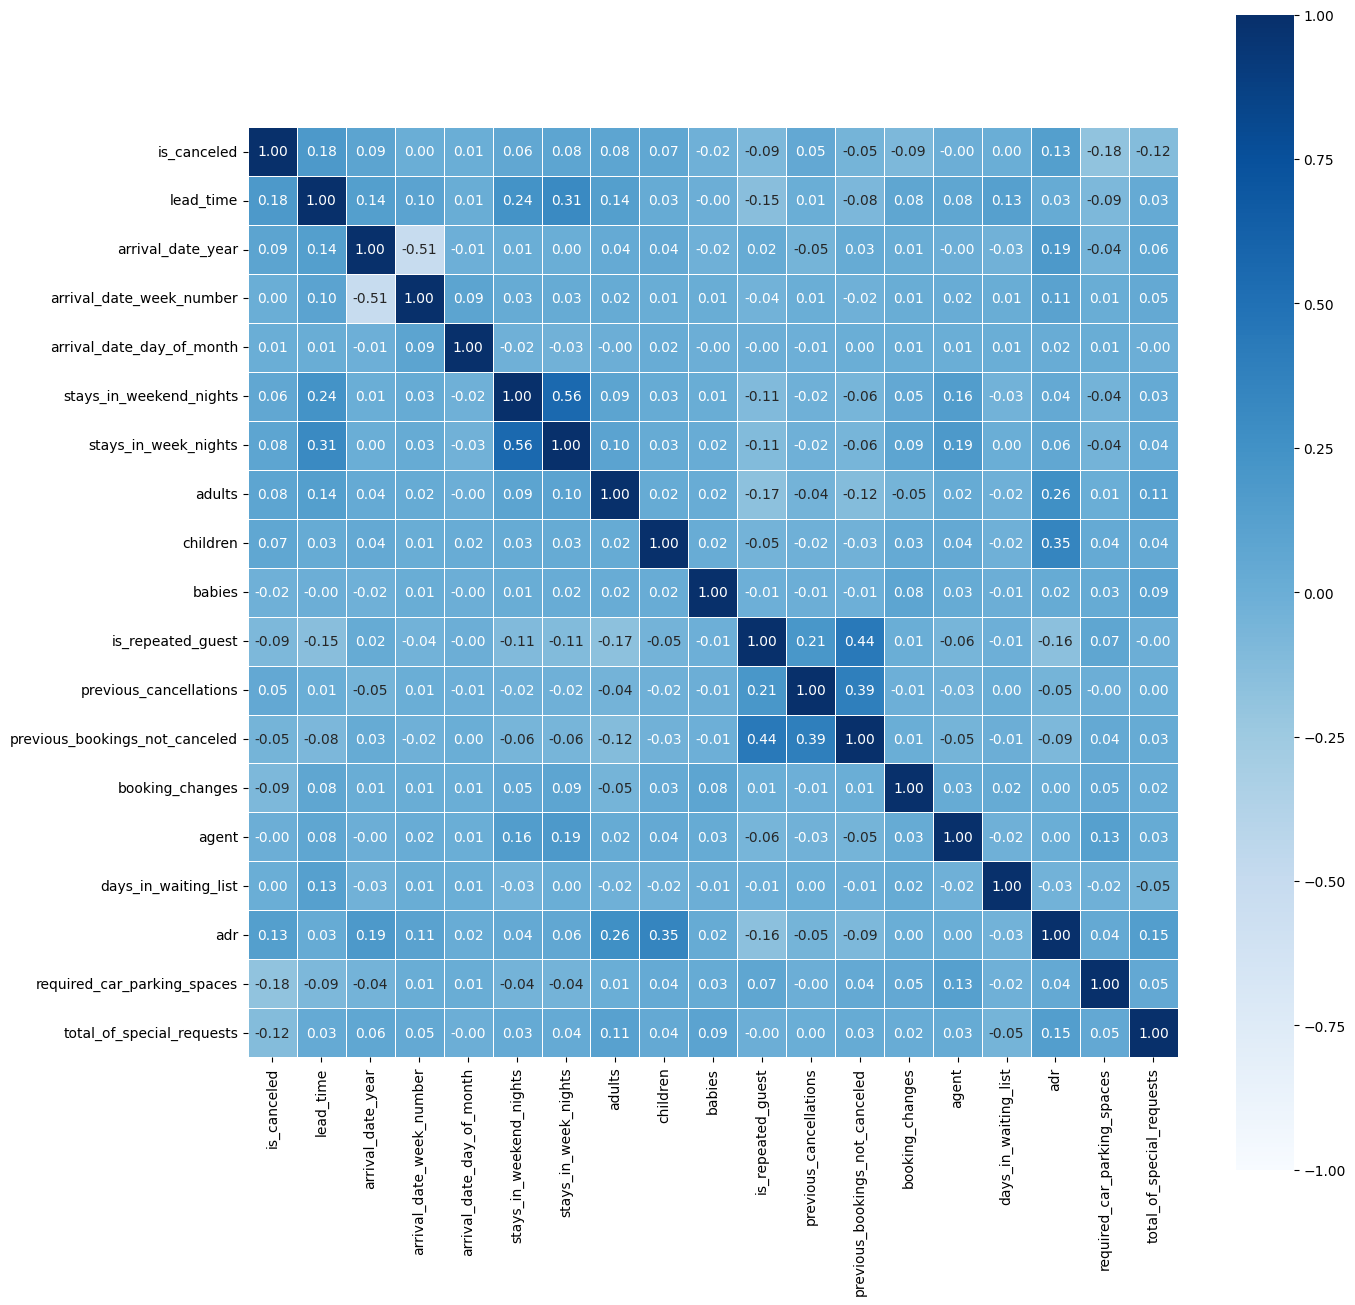

In [262]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(pdf[num_list].corr(), annot=True, fmt=".2f", linewidths=.5, square = True, cmap="Blues", vmin=-1, vmax=1)

Nhìn vào biểu đồ này ta thấy được một vài điểm quan trọng như:
-	is_canceled có độ tương quan lớn nhất với là với lead_time, có vẻ như khách hàng sẽ đắn đo suy nghĩ việc cancel một lịch đặt hay không dựa vào thời gian lead_time của lịch đặt này.
-	Previous_booking_not_canceled có độ tương quan rất cao với is_repeated_guess, việc này nói lên rằng khách hàng quen sẽ có xu hướng huỷ lịch khác hơn rất nhiều so với khách hàng lần đầu.
-	Chỉ số chi tiêu trung bình hằng ngày adr có độ tương quan lớn với children, số lượng trẻ em có thể là nhân tố quyết định chi tiêu của phụ huynh khi ở khách sạn.


### 2. Sử dụng Scatter plot để phân tích dữ liệu 2D.

##### Câu hỏi 1: previous_cancelation và previous_booking_not_canceled có mối quan hệ như thế nào

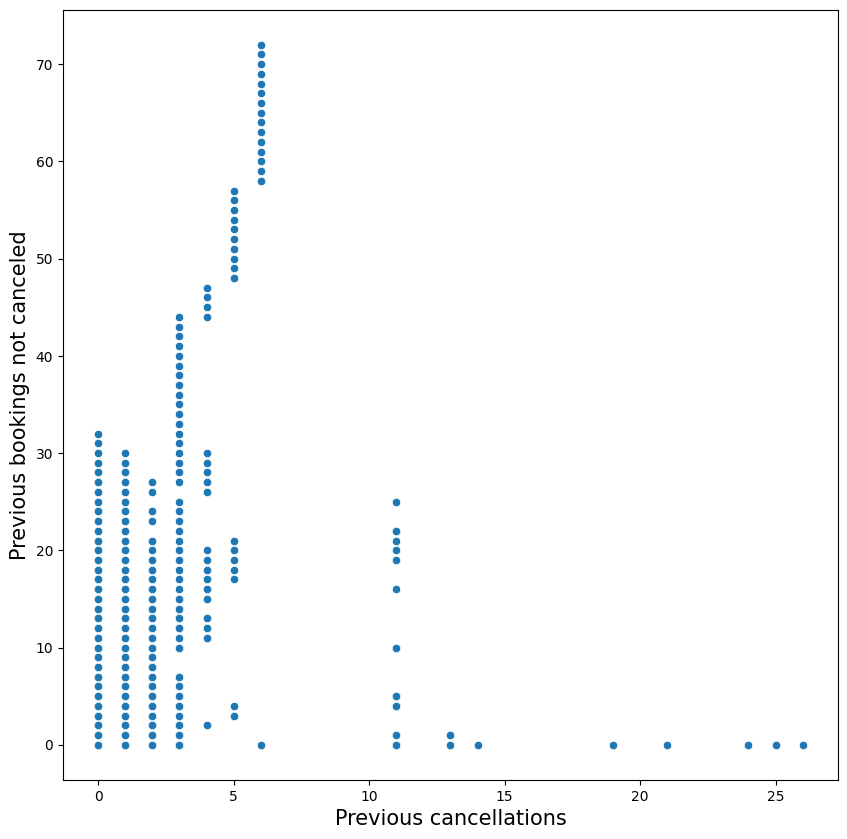

In [264]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=pdf, x="previous_cancellations", y="previous_bookings_not_canceled")
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

Trả lời: previous_cancellations tương quan thuận với previous_bookings not_canceled

##### Câu hỏi 2: Số lượng trẻ em có ảnh hưởng tới mức chi tiêu trung bình hằng ngày không?

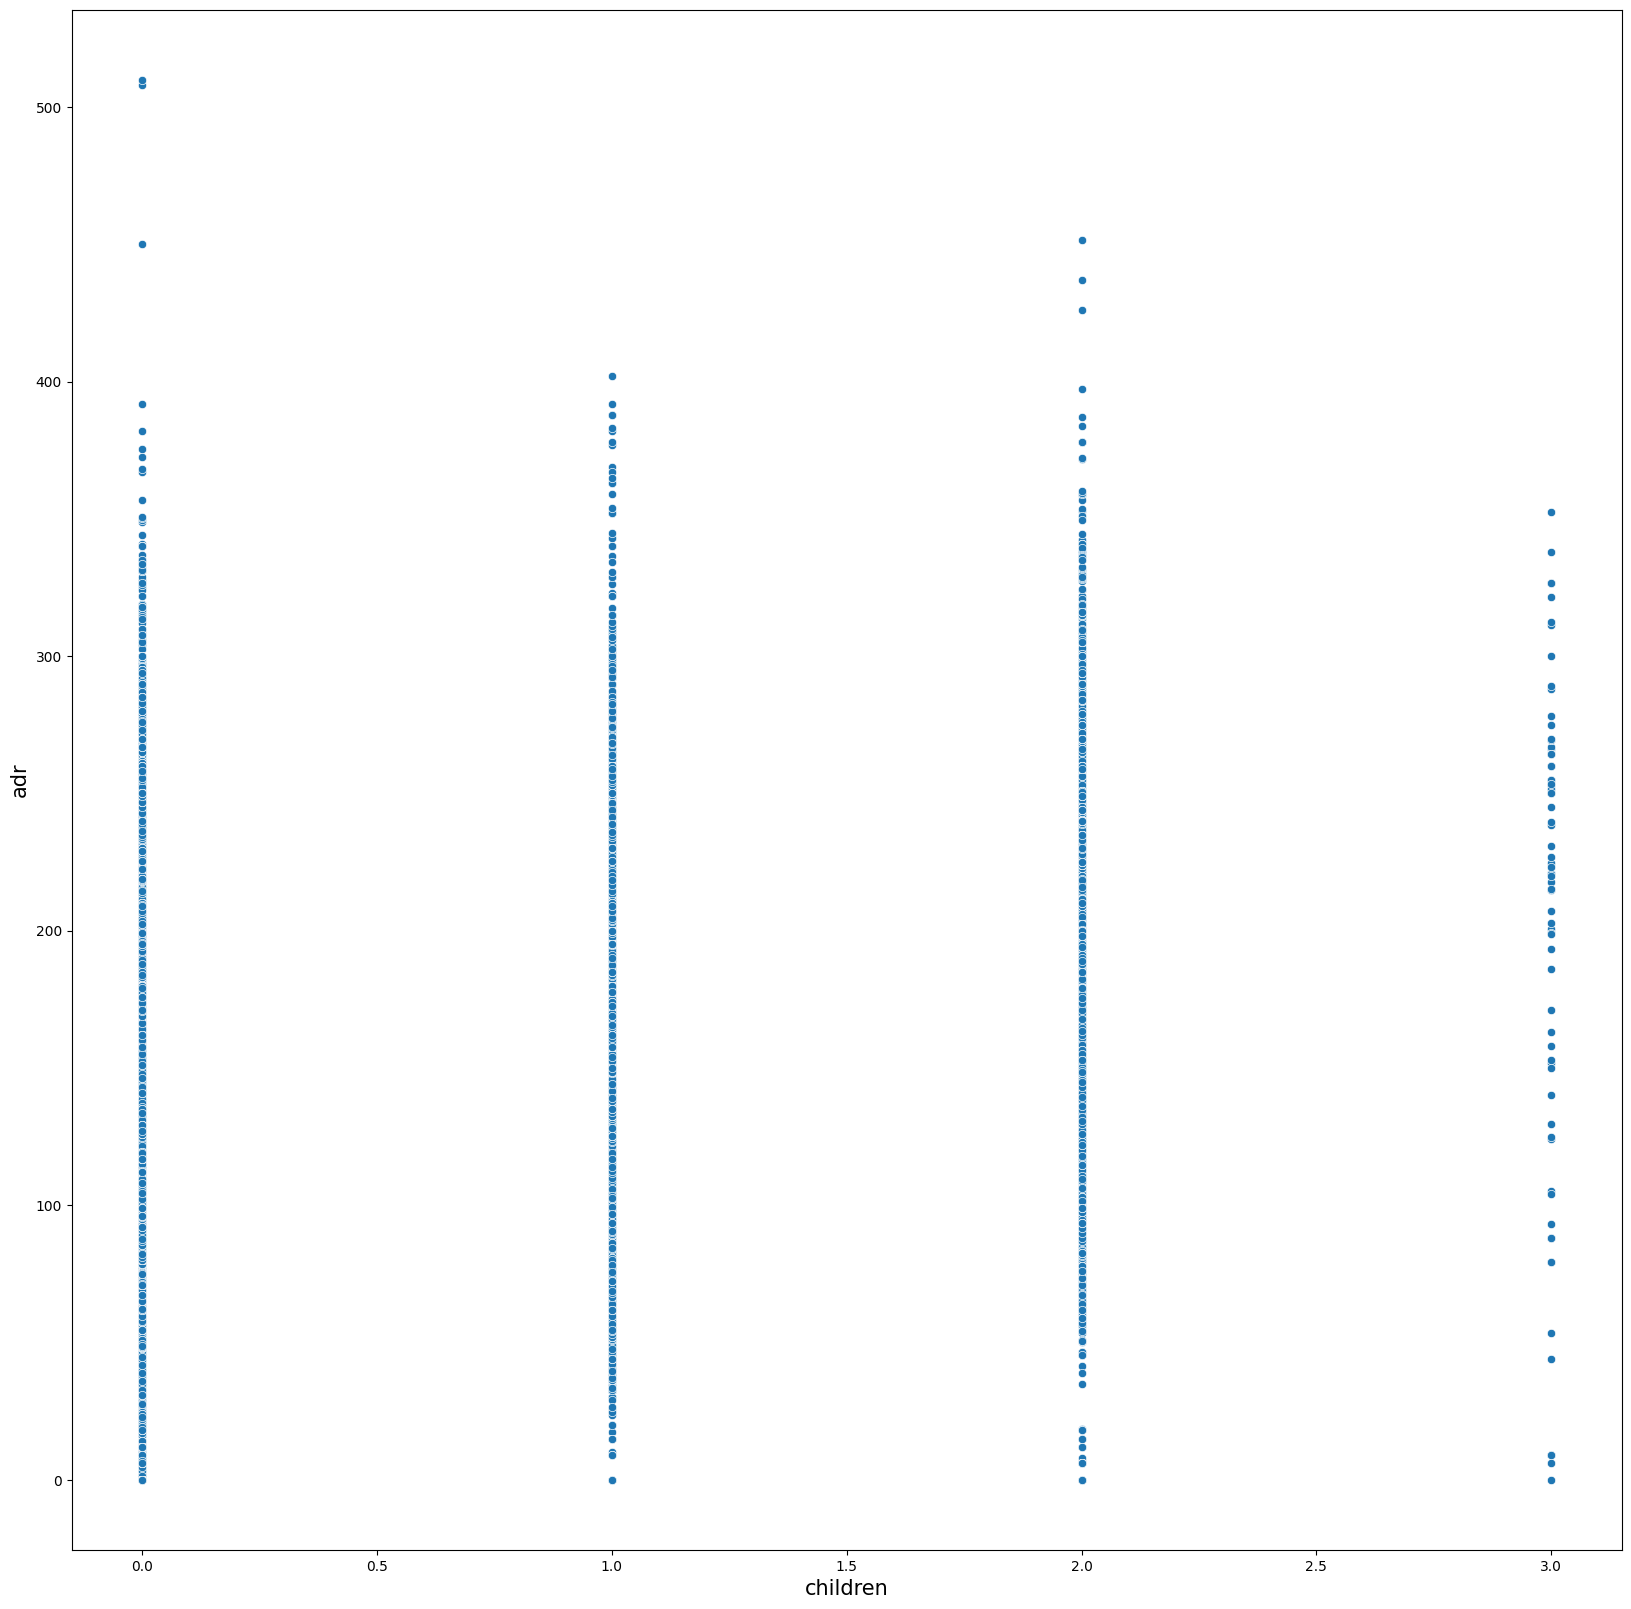

In [284]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.scatterplot(data=pdf[pdf['children'] <= 5], y="adr", x="children")
plt.ylabel('adr', size = 15)
plt.xlabel('children', size = 15)
plt.show()

Trả lời: Số lượng trẻ em có ảnh hưởng nhất định tới chỉ số chi tiêu hàng ngày, phụ huynh có từ 1 tới 2 trẻ đi cùng có xu hướng chi tiêu nhiều hơn so với những người còn lại.

##### Câu hỏi 3: Khách hàng ở càng lâu có càng chi nhiều hơn không?

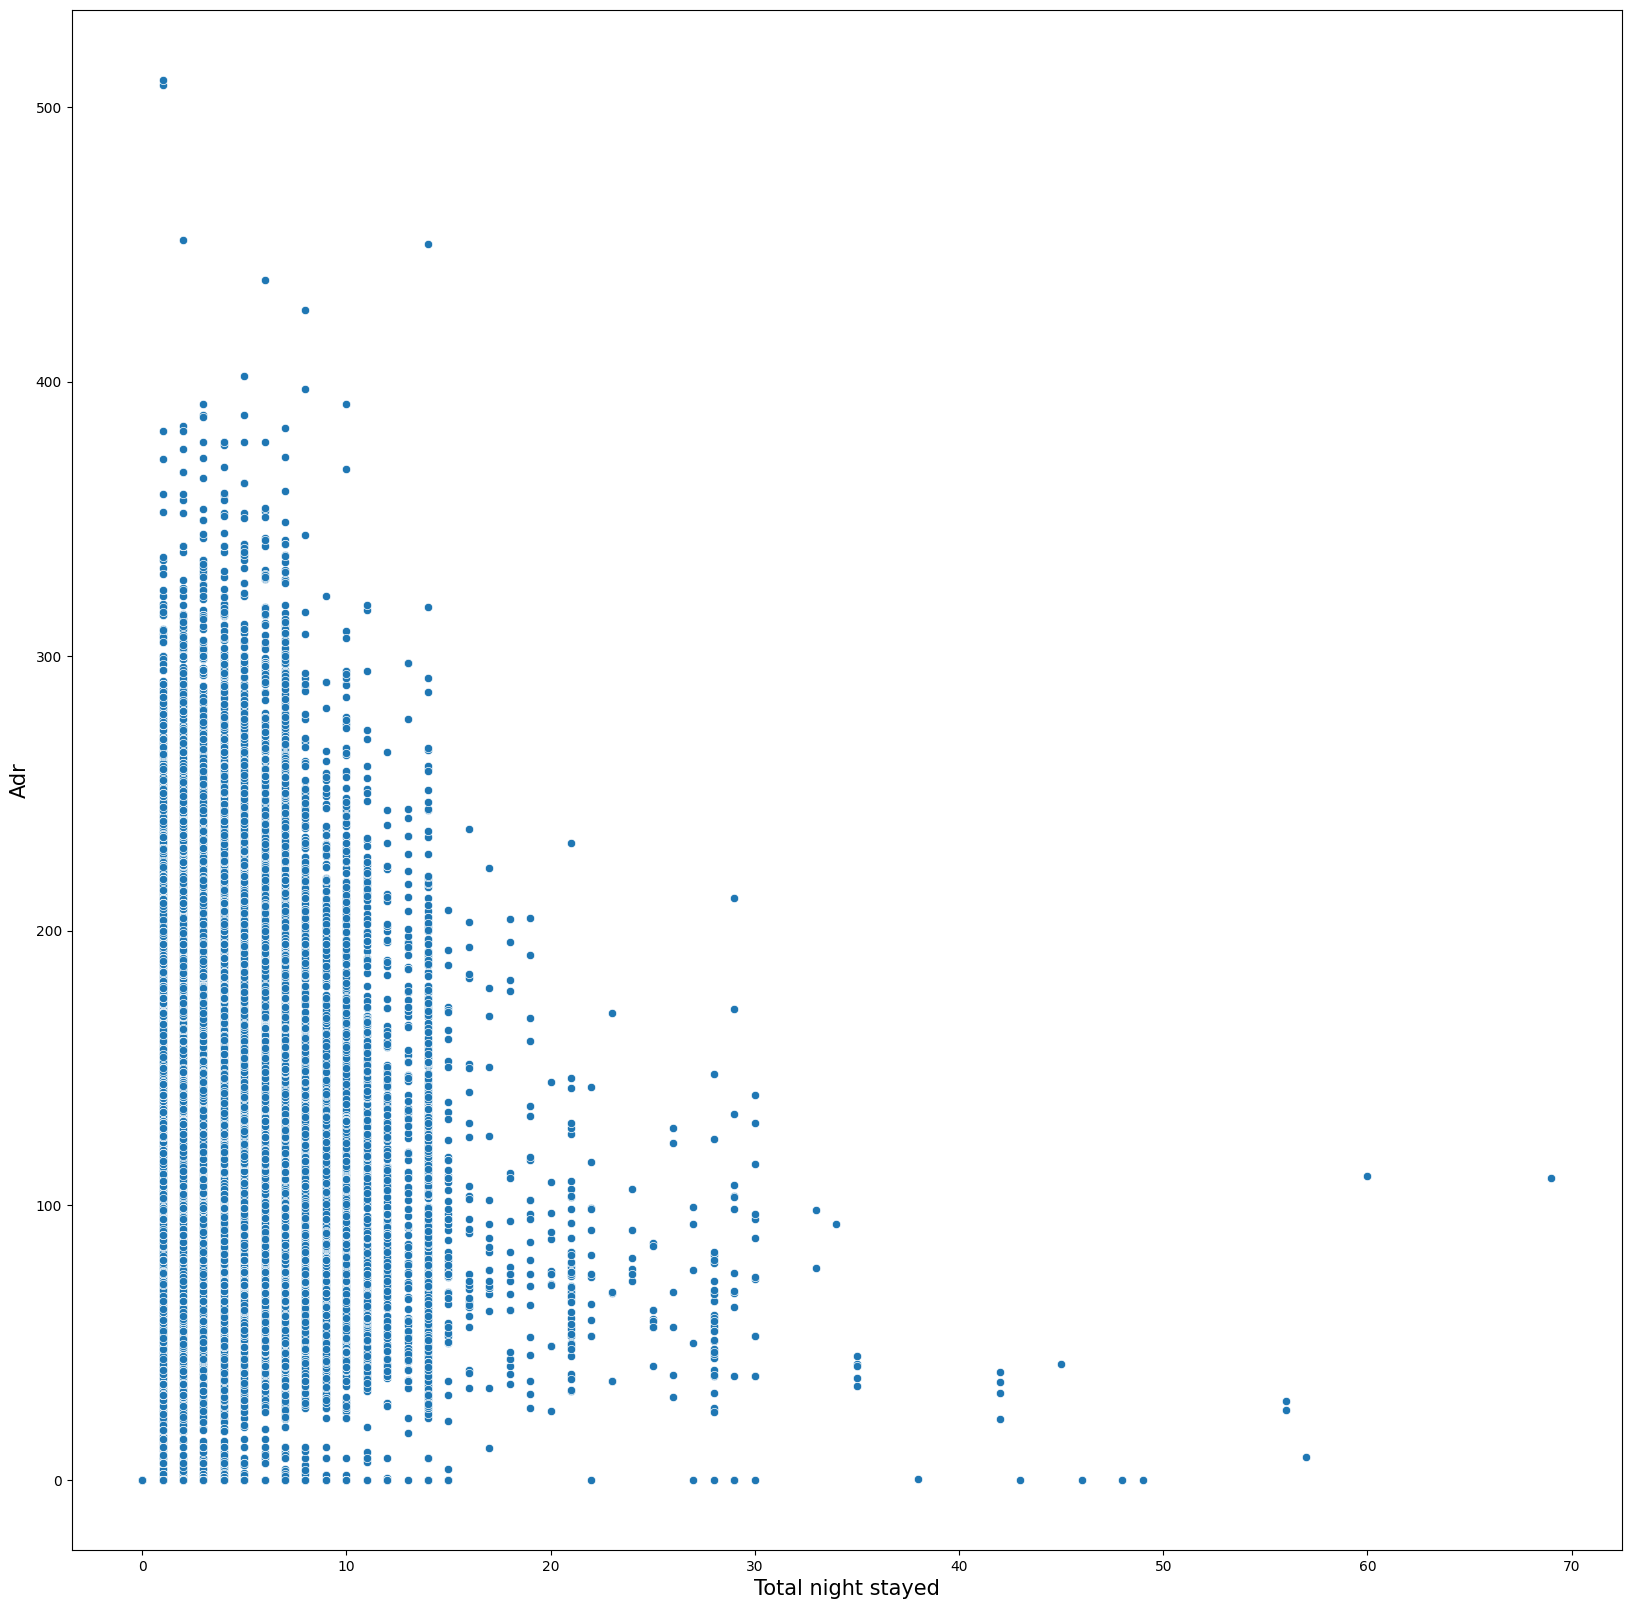

In [266]:
pdf['total_stay_night'] = pdf['stays_in_week_nights'] + pdf['stays_in_weekend_nights']
fig, ax = plt.subplots(figsize=(20, 20))    
ax = sns.scatterplot(data=pdf, x="total_stay_night", y="adr")
plt.xlabel('Total night stayed', size = 15)
plt.ylabel('Adr', size = 15)
plt.show()


Trả lời: total_night_stayed tương quan nghịch với adr, nghĩa là khách hàng ở càng lâu có xu hướng tiêu càng ít cho các dịch vụ của khách sạn.

### 3. Sử dụng bar chart để phân tích dữ liệu num và cate

#### Câu hỏi 4: Đa phần các khách đặt chỗ đến từ nước nào?

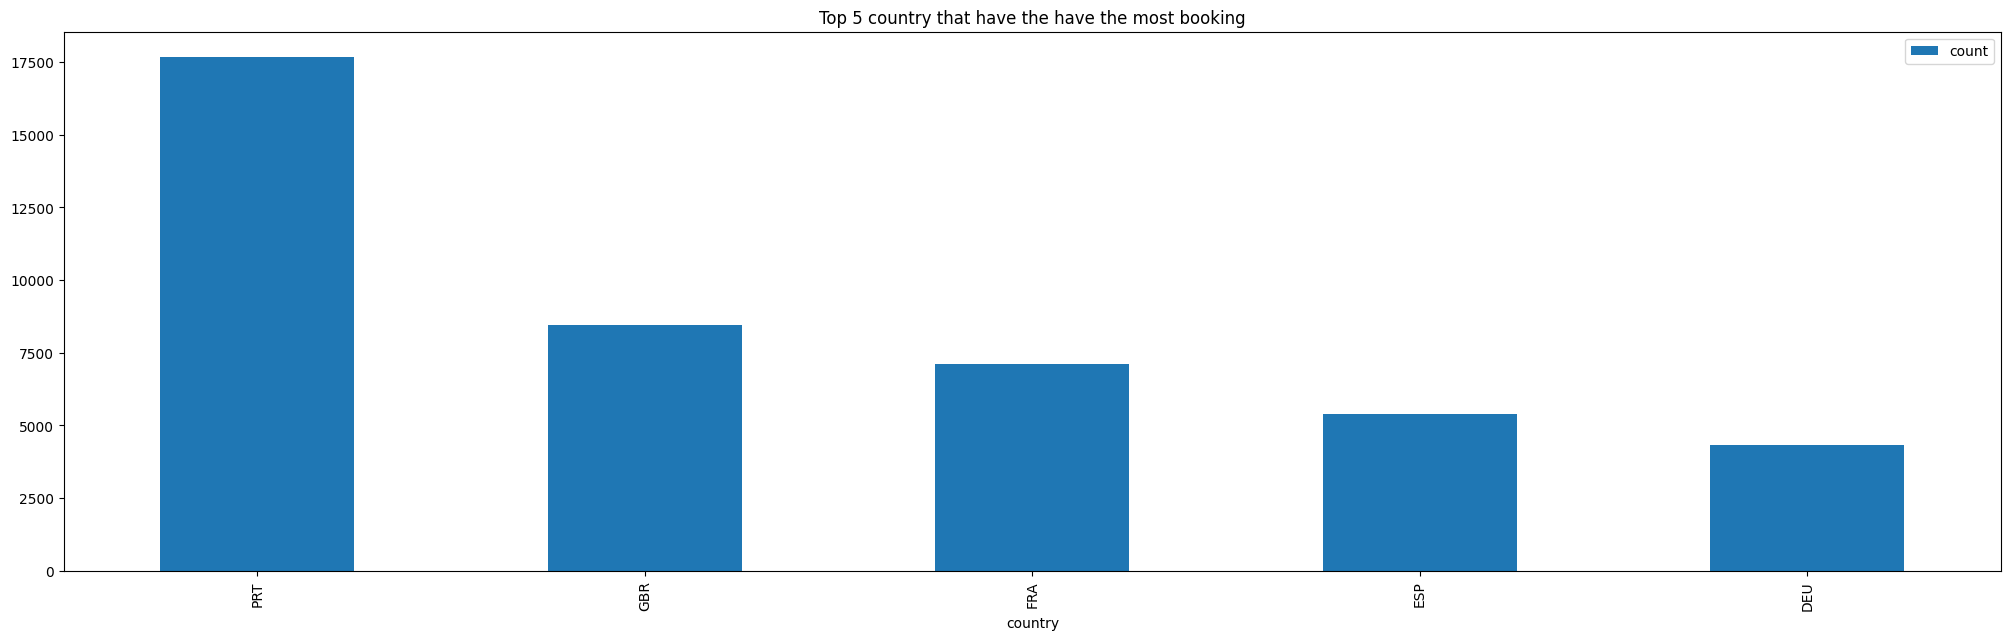

In [267]:
data_country = pd.DataFrame(pdf.loc[pdf['is_canceled'] != 1]['country'].value_counts())
data_country.head(5).plot(kind='bar', figsize=(25, 7), stacked=True, title="Top 5 country that have the have the most booking");

Trả lời: Có thể thấy một phần rất lớn du khách đến từ PRT (Bồ Đào Nha), có thể hotel và resort đang được ghi nhận nằm ở Bồ Đào Nha.

##### Câu hỏi 5: Xu hướng huỷ lịch đặt của khách lần đầu với khách quen (đã sử dụng dịch vụ của khách sạn từ một lần trở lên) có khác nhau không?

<Axes: title={'center': 'Number of canceled made by guest type'}, xlabel='is_repeated_guest'>

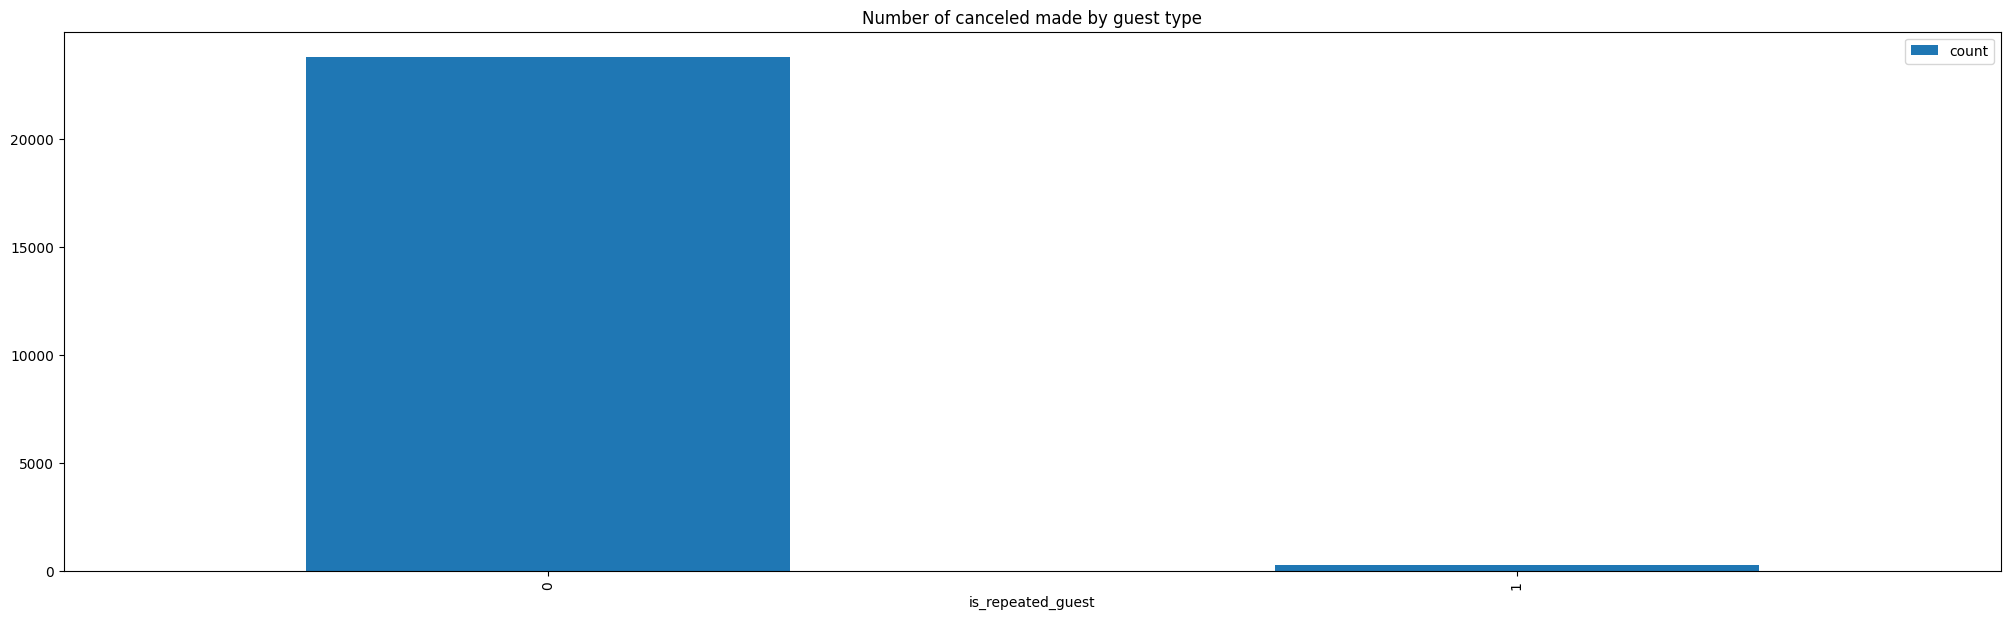

In [268]:
data_canceled = pd.DataFrame(pdf.loc[pdf['is_canceled'] == 1]['is_repeated_guest'].value_counts())
data_canceled.plot(kind='bar', figsize=(25, 7), stacked=True, title="Number of canceled made by guest type")

Phần lớn các trường hợp huỷ hẹn được thực hiện bởi khách đặt lần đầu.

Tỉ lệ huỷ lịch của khách đặt lần đầu cao hơn nhiều lần so với tỉ lệ huỷ lịch của khách quen.

##### Câu hỏi 6: Khách sạn được đặt qua kênh là nhiều nhất?

<Axes: xlabel='distribution_channel', ylabel='count'>

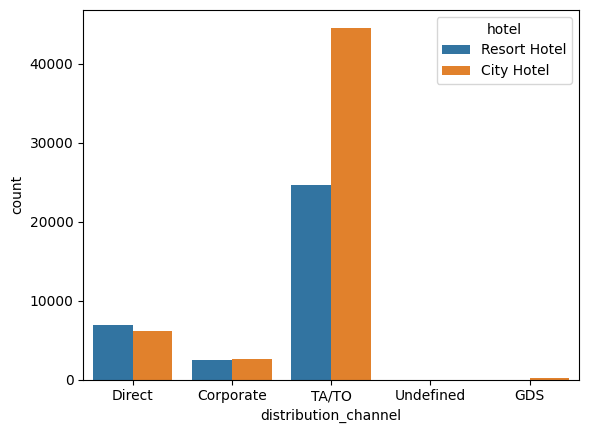

In [269]:
sns.countplot(x = 'distribution_channel', data = pdf, hue='hotel') 

Đa phòng các phòng được đặt thông qua kênh TA/TO nghĩa là các thông qua các kênh dịch vụ du lịch. Đứng ở vị trí thứ hai lần lượt là do khách hàng tự đặt và do công ty đặt cho.

##### Câu hỏi 7: Khách sạn thường được đặt phòng nhiều nhất vào thời điểm nào trong năm?

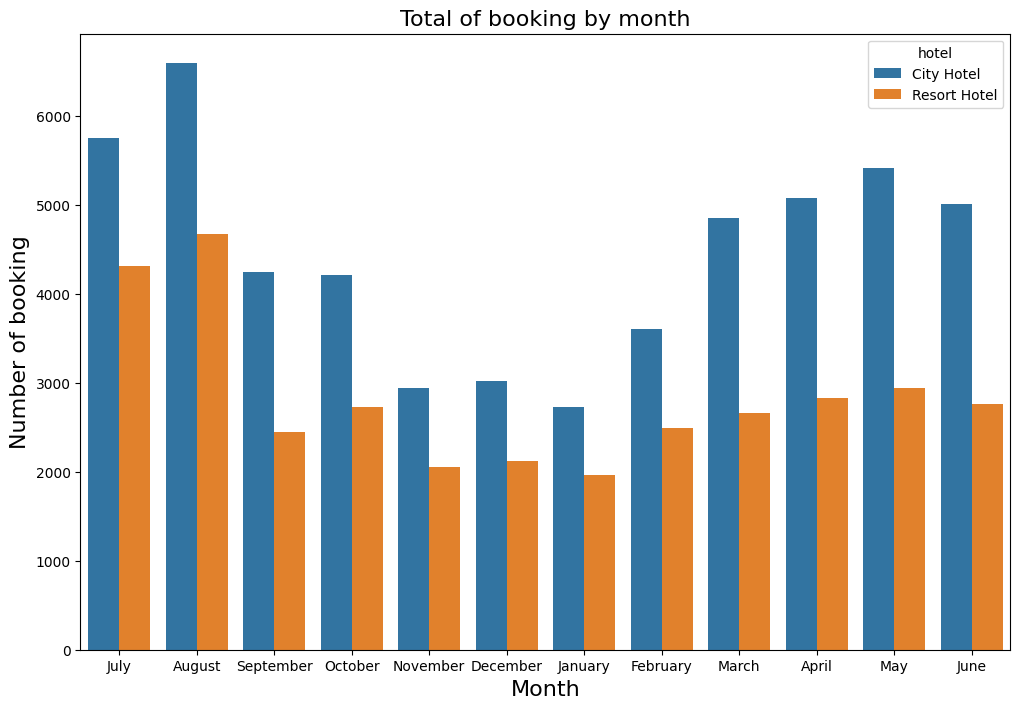

In [270]:
plt.figure(figsize=(12, 8))
sns.countplot(x = "arrival_date_month", hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=pdf)
plt.title("Total of booking by month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of booking", fontsize=16)
plt.show()

Khách sạn thường được đặt phòng nhiều nhất vào thời điểm giữa năm, đặc biệt là các tháng hè 7 và 8. Những tháng ảm đạm nhất thường là khoảng thời gian cuối năm và dịp năm mới như tháng 11 đến tháng 1.

### 4. Tính tỷ trọng đối với hai biến cate.

In [271]:
for i in range(len(cate_list)):
    print(cate_list[i])
pdf.groupby([cate_list[0]]).agg({num_list[2]: ['min', 'mean', 'std', 'max']})

hotel
arrival_date_month
meal
country
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
customer_type
reservation_status
reservation_status_date


arrival_date_year                            
                           min         mean      std   max
hotel                                                     
City Hotel                2015 2,016.253973 0.659297  2017
Resort Hotel              2015 2,016.141579 0.720943  2017

In [272]:
pdf.groupby([cate_list[0], cate_list[1]]).agg({cate_list[2]: 'count'})/len(pdf)

meal
hotel        arrival_date_month         
City Hotel   April              0.058128
             August             0.075417
             December           0.034487
             February           0.041250
             January            0.031238
             July               0.065725
             June               0.057269
             March              0.055553
             May                0.061938
             November           0.033664
             October            0.048150
             September          0.048516
Resort Hotel April              0.032359
             August             0.053390
             December           0.024224
             February           0.028526
             January            0.022461
             July               0.049351
             June               0.031581
             March              0.030391
             May                0.033664
             November           0.023491
             October            0.031192
             September          0.028034

In [273]:
pdf.groupby([cate_list[0], cate_list[2]]).agg({cate_list[2]: 'count'})/len(pdf)

meal
hotel        meal              
City Hotel   BB        0.471749
             FB        0.000126
             HB        0.031936
             SC        0.107525
Resort Hotel BB        0.306062
             FB        0.003993
             HB        0.072019
             SC        0.000961
             Undefined 0.005630

<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
IV. EDA 3D
</div>

### 1. Sử dụng Scatter plot để phân tích dữ liệu 3D cho ba biến num.

#### Câu hỏi: Liệu có sự tương quan giữa số ngày ở, số trẻ em và số yêu cầu đặc biệt dành cho khách sạn không

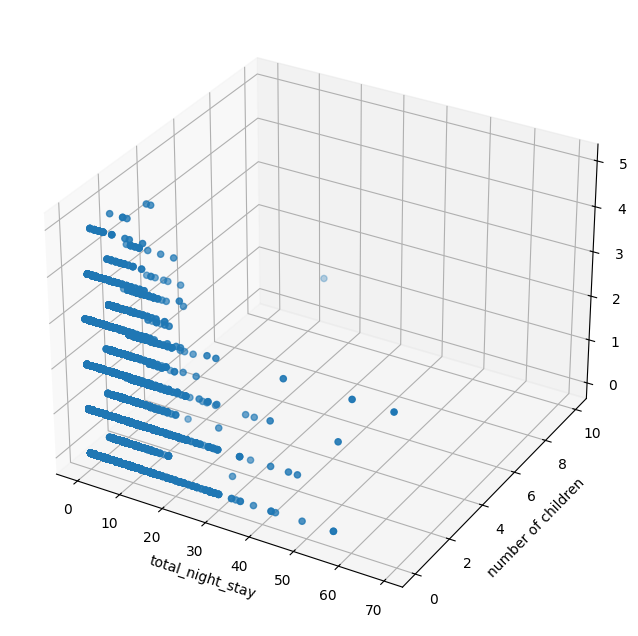

In [280]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')


ax.scatter(pdf['total_stay_night'], pdf[num_list[8]], pdf[num_list[18]])
ax.set_xlabel("total_night_stay")
ax.set_ylabel("number of children")
ax.set_zlabel("total special request")
plt.show()


### 2. Sử dụng Scatter plot 2D và màu đối với hai biến num và cate.

#### Câu hỏi : Thời gian chờ trước khi được xác nhận lịch của các loại khách và sự phân bố các loại khách ở hai khách sạn có khác nhau không?

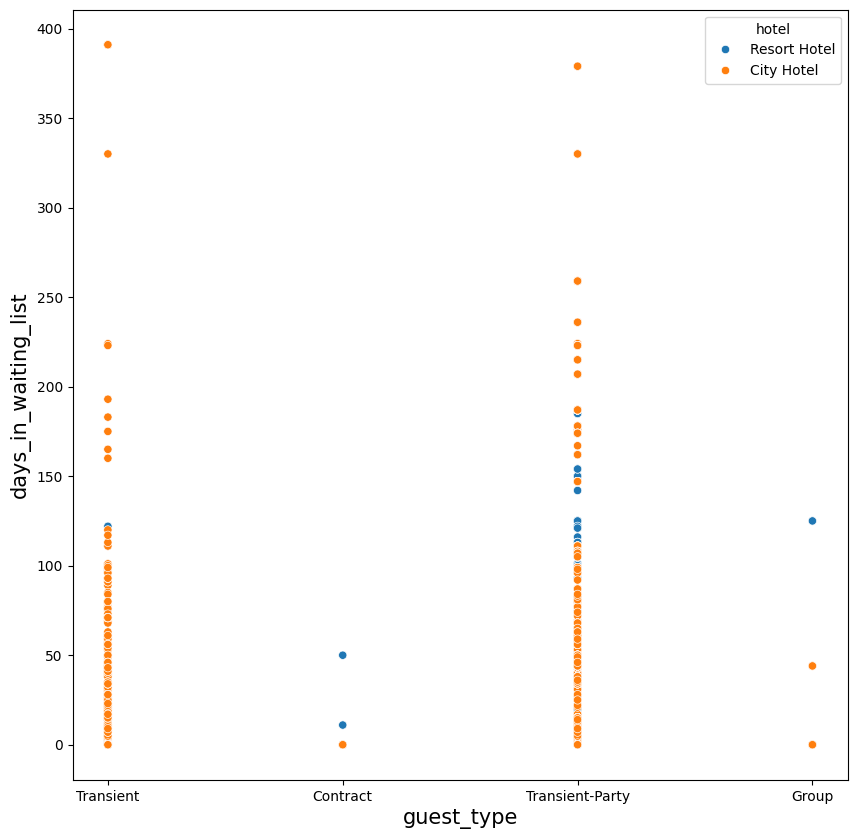

In [286]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=pdf, x="customer_type", y="days_in_waiting_list", hue=cate_list[0])
plt.xlabel('guest_type', size = 15)
plt.ylabel('days_in_waiting_list', size = 15)
plt.show()

#### Câu hỏi : Thời gian ở và chi tiêu trung bình hàng ngày của khách ở hai khách sạn có sự khác nhau không?

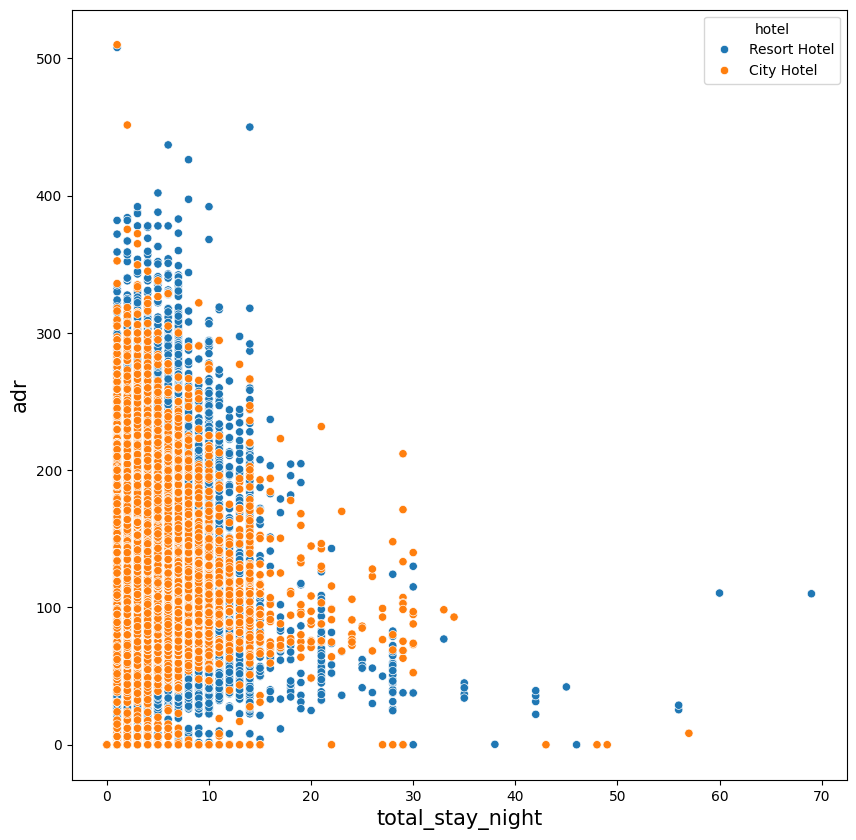

In [288]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=pdf, x="total_stay_night", y="adr", hue=cate_list[0])
plt.xlabel('total_stay_night', size = 15)
plt.ylabel('adr', size = 15)
plt.show()

### 3. Tính tỷ trọng theo bin chia theo thể loại với hai biến cate.

In [295]:
pdf.groupby(cate_list[0]).agg({num_list[1]: ['min', 'mean', 'std', 'max'], num_list[7]: ['min', 'mean', 'std', 'max']})

lead_time                          stays_in_week_nights           \
                   min      mean       std  max                  min     mean   
hotel                                                                           
City Hotel           0 77.679319 82.113942  629                    0 2.274468   
Resort Hotel         0 83.368652 91.799632  737                    0 3.177319   

                           
                  std max  
hotel                      
City Hotel   1.618636  41  
Resort Hotel 2.496226  50

# Insight 

* previous cancellations tương quan thuận với previous bookings not canceled
* Trung bình previous cancellations của City Hotel cao hơn trung bình previous cancellations của Resort Hotel  